# Analiza iger

In [1]:
import pandas as pd

In [2]:
igre = pd.read_csv("../zberi_podatke/csv_datoteke/igre.csv")

In [3]:
konzole = pd.read_csv("../zberi_podatke/csv_datoteke/konzole.csv").set_index('id_konzole')

In [4]:
igre

,id_igre,ime,konzola,ocena,tezavnost,dolzina,povezava
0,197771,The Legend of Zelda: Ocarina of Time,84,4.59,3.09,42.69,/n64/197771-the-legend-of-zelda-ocarina-of-time
1,641695,Persona 4 Golden,117,4.59,3.06,78.65,/vita/641695-persona-4-golden
2,950181,Chrono Trigger,108,4.58,2.97,44.30,/ds/950181-chrono-trigger
3,196885,Castlevania: Symphony of the Night,78,4.58,3.03,33.25,/ps/196885-castlevania-symphony-of-the-night
4,563538,Chrono Trigger,63,4.57,2.95,46.59,/snes/563538-chrono-trigger
...,...,...,...,...,...,...,...
8575,739988,Depression Quest,19,1.20,1.19,0.76,/pc/739988-depression-quest
8576,588576,Pit-Fighter,63,1.20,4.37,3.82,/snes/588576-pit-fighter
8577,974874,Hong Kong 97,63,1.17,4.32,24.01,/snes/974874-hong-kong-97
8578,563406,Dr. Jekyll and Mr. Hyde,41,1.13,4.69,10.14,/nes/563406-dr-jekyll-and-mr-hyde


In [5]:
konzole

,ime_konzole
id_konzole,
61,3DO
116,3DS
48,Acorn Archimedes
32,Adventurevision
122,Amazon Fire TV
...,...
111,Xbox 360
121,Xbox One
129,Xbox Series X


In [5]:
združena_razpredelnica = pd.merge(igre, konzole, left_on='konzola', right_on='id_konzole').drop('konzola', 1).set_index('id_igre')

In [7]:
združena_razpredelnica

,ime,ocena,tezavnost,dolzina,povezava,ime_konzole
id_igre,,,,,,
197771,The Legend of Zelda: Ocarina of Time,4.59,3.09,42.69,/n64/197771-the-legend-of-zelda-ocarina-of-time,Nintendo 64
197770,The Legend of Zelda: Majora's Mask,4.42,3.38,41.92,/n64/197770-the-legend-of-zelda-majoras-mask,Nintendo 64
198848,Super Mario 64,4.40,3.12,35.64,/n64/198848-super-mario-64,Nintendo 64
198849,Paper Mario,4.36,2.92,34.98,/n64/198849-paper-mario,Nintendo 64
196694,Banjo-Kazooie,4.33,3.07,31.38,/n64/196694-banjo-kazooie,Nintendo 64
...,...,...,...,...,...,...
584373,Star Wars Arcade,3.34,3.77,12.17,/sega32x/584373-star-wars-arcade,Sega 32X
916579,Super Mario Bros.: The Lost Levels,3.64,4.64,11.69,/famicomds/916579-super-mario-bros-the-lost-le...,Famicom Disk System
564210,Zelda: The Wand of Gamelon,2.50,3.72,15.73,/cdi/564210-zelda-the-wand-of-gamelon,CD-I


# Hipoteze

## 1. Ali imajo težje igre v povprečju nižjo oceno?

To lahko izvemo s tem, da narišemo graf ocen v odvisnosti od težavnosti:

In [8]:
po_tezavnosti = združena_razpredelnica.sort_values('tezavnost')

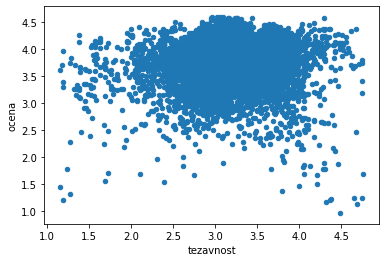

In [9]:
po_tezavnosti.plot.scatter(x='tezavnost', y='ocena')

Iz grafa je razvidno, da:

1. Večina iger ima ocena vsaj 2.5 in težavnost med 2.0 in 4.0

2. Če igra opazno odstopa od povprečne težavnosti (torej, če je izrazito nadpovprečno/podpovprečno težka), potem je večja verjetnost, da bo imela igra nižjo oceno (nižjo od recimo 2.5). To še posebej velja za nadpovprečno težke igre.

Slednja opazka je za nas zanimivejša. Bolje jo lahko ilustriramo, če vzamemo povprečno oceno za vsako težavnost:

In [10]:
po_tezavnosti_povprecje = združena_razpredelnica.groupby('tezavnost').mean()

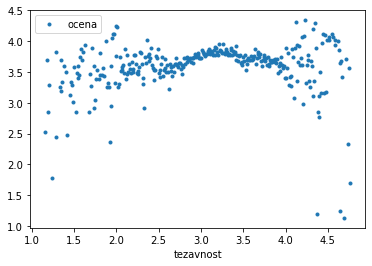

In [11]:
po_tezavnosti_povprecje.plot(style='.')

Opazimo lahko, da je za 'povprečne' težavnosti ocena dokaj nespremenljiva. To je zato, ker imamo pri povprečnih težavnostih večje število iger, torej večji nabor podatkov. Ko se premaknemo izven povprečja težavnosti, postanejo povprečja kaotična.

Toda ne le da dobivamo najnižja povprečja ocen 'na robovih' (tj. pri ekstremnih težavnostih), ampak tam dobivamo tudi najvišja povprečja, kar je posledica premajhnega nabora podatkov za tiste težavnosti. 

Odgovor na vprašanje, ali so težje igre v povprečju slabše ocenjene, ni tako izrazito pritrdilen, saj je veliko težkih iger zelo dobro ocenjenih. Po drugi strani pa vidimo, da je eden izmed razlogov za slabšo oceno lahko tudi previsoka težavnost. Hipoteza je torej deloma pravilna.

## 2. Ali so starejše igre v povprečju težje oz. imajo nižjo oceno?

Ker nimamo podatkov o datumih izidov posameznih iger, bomo uporabili podatke o 'življenskih ciklih' posameznih konzol oz. kdaj so posamezne konzole bile relevantne. Tako bomo lahko približno uvrstili posamezne igre na časovni trak. 

Uvozili bomo podatke o datumih, ko je določena konzola izšla, namreč ti dovolj dobro predstavljajo življenska obdobja konzol:

In [6]:
datumi = pd.read_csv("../zberi_podatke/csv_datoteke/datumi_konzol.csv").set_index('id_konzole')

Zdaj združimo razpredelnice, ki jih imamo:

In [7]:
vmesna_razpredelnica = pd.merge(igre, datumi, left_on='konzola', right_on='id_konzole').set_index('id_igre')

In [9]:
združena_razpredelnica_z_datumi = pd.merge(vmesna_razpredelnica, konzole, left_on='konzola', right_on='id_konzole').drop('konzola', 1)

In [10]:
združena_razpredelnica_z_datumi

,ime,ocena,tezavnost,dolzina,povezava,datum_konzole,ime_konzole
0,The Legend of Zelda: Ocarina of Time,4.59,3.09,42.69,/n64/197771-the-legend-of-zelda-ocarina-of-time,1996-06-23,Nintendo 64
1,The Legend of Zelda: Majora's Mask,4.42,3.38,41.92,/n64/197770-the-legend-of-zelda-majoras-mask,1996-06-23,Nintendo 64
2,Super Mario 64,4.40,3.12,35.64,/n64/198848-super-mario-64,1996-06-23,Nintendo 64
3,Paper Mario,4.36,2.92,34.98,/n64/198849-paper-mario,1996-06-23,Nintendo 64
4,Banjo-Kazooie,4.33,3.07,31.38,/n64/196694-banjo-kazooie,1996-06-23,Nintendo 64
...,...,...,...,...,...,...,...
8575,Star Wars Arcade,3.34,3.77,12.17,/sega32x/584373-star-wars-arcade,1994-11-21,Sega 32X
8576,Super Mario Bros.: The Lost Levels,3.64,4.64,11.69,/famicomds/916579-super-mario-bros-the-lost-le...,1986-02-21,Famicom Disk System
8577,Zelda: The Wand of Gamelon,2.50,3.72,15.73,/cdi/564210-zelda-the-wand-of-gamelon,1991-12-03,CD-I
8578,Link: The Faces of Evil,2.22,4.02,20.91,/cdi/564181-link-the-faces-of-evil,1991-12-03,CD-I


Zdaj igre združimo po konzolah in razvrstimo po datumih, ko so konzole izšle:

In [22]:
sortirana_razpredelnica = združena_razpredelnica_z_datumi.sort_values('datum_konzole')

In [27]:
razpredelnica_po_konzolah = sortirana_razpredelnica.groupby('ime_konzole', sort=False)  # 'sort=False' ohranja prejšnji vrstni red, v našem primeru časovni vrstni red konzol

In [ ]:
Najprej poglejmo ocene v odvisnosti od časa:

In [32]:
razpredelnica_po_konzolah.mean()

,ocena,tezavnost
ime_konzole,,
PC,3.807121,3.120159
Atari 2600,3.466667,3.135926
Arcade Games,3.813143,3.397429
MSX,3.870000,3.510000
NES,3.259951,3.479531
Macintosh,4.056667,2.990000
Sega Master System,3.546333,3.470333
Famicom Disk System,3.640000,4.640000
Acorn Archimedes,4.170000,4.190000


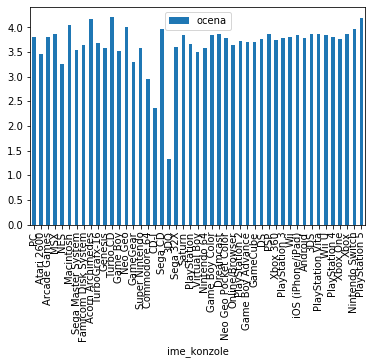

In [24]:
razpredelnica_po_konzolah.mean().plot.bar(y='ocena')

Vidimo, da je v zadnjih dveh desetletjih ocena precej konstantna, razen na najnovejši konzoli, na kateri pa je zaenkrat še premalo iger (z dovolj glasovi, da bi se pojavile na našem seznamu), da bi lahko našli kakšne verodostojne ugotovitve. Na starejših konzolah so podatki malo bolj razpršeni, verjetno zato, ker je manj ljudi na spletni strani oddalo glas za starejše igre.

Na starejših konzolah so razlike bolj izrazite. Poglejmo zakaj:

In [31]:
razpredelnica_po_konzolah.size()

ime_konzole
PC                      1320
Atari 2600                27
Arcade Games              70
MSX                        2
NES                      405
Macintosh                  3
Sega Master System        30
Famicom Disk System        1
Acorn Archimedes           1
TurboGrafx-16             11
Genesis                  212
Turbo CD                   3
Game Boy                  89
Neo Geo                   10
GameGear                  13
Super Nintendo           323
Commodore 64               2
CD-I                       2
Sega CD                   12
3DO                        1
Sega 32X                   5
Saturn                    44
PlayStation              402
Virtual Boy                2
Nintendo 64              156
Game Boy Color            45
Dreamcast                 92
Neo Geo Pocket Color       3
Online/Browser            10
PlayStation 2            735
Game Boy Advance         194
GameCube                 206
DS                       357
PSP                      302
Xb

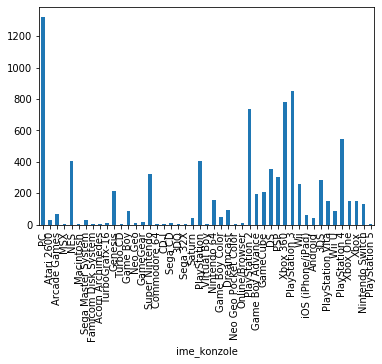

In [30]:
razpredelnica_po_konzolah.size().plot.bar()

Vidimo, da imajo novejše konzole v povprečju veliko več iger na tem seznamu kot starejše. Tiste konzole, ki po povprečni oceni najbolj odstopajo, imajo ponavadi še najmanj iger, zato na podlagi njihovih podatkov ne moremo delati prave analize.

Poglejmo najbolj ekstremne primere: pozitivno odstopajo MSX, Macintosh, Acorn Archimedes, Turbo CD in Neo Geo, od teh imajo vsi kvečjemu 10 iger v bazi podatkov, zato te ocene nič ne pomenijo. Podobno negativno odstopajo Commodore 64, CD-I in 3DO, od teh imajo vsi le en ali dva vnosa.

Če teh ekstremnih primerov ne upoštevamo, vidimo, da so povprečne ocene starejših iger rahlo pod povprečnimi ocenami novejših iger.

Odstranimo zdaj konzole z malo igrami:

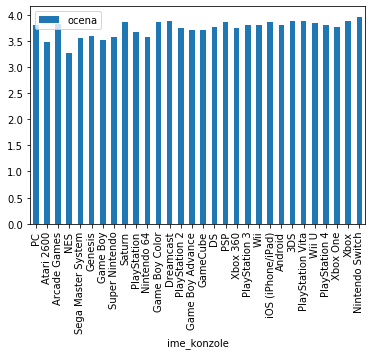

In [45]:
razpredelnica_po_konzolah.mean()[razpredelnica_po_konzolah.size() >= 20].plot.bar(y='ocena')

Povprečna ocena res malce narašča skozi čas. Ignoriramo lahko podatek PC-ja, saj so računalniške igre bile aktualne praktično skozi celotno zgodovino iger.

Poglejmo še težavnosti:

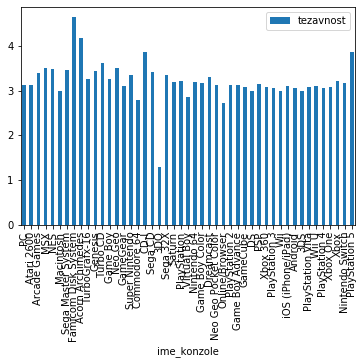

In [25]:
razpredelnica_po_konzolah.mean().plot.bar(y='tezavnost')